# Introduction

# Stage 1: Ask questions and determine tasks
#### The stakeholders: 
* Unknown

#### The business tasks:
* Exploration and analysis
* Determine patterns and correlations of the most succesful video games.

# Stage 2: Preparation
**Data:** [click here](https://www.kaggle.com/gregorut/videogamesales)<br>
**License:** [click here](https://github.com/GregorUT/vgchartzScrape/blob/master/LICENSE)<br>
**Description**: This data set contains the information about video game sales above 100 000 copies. The data includes mostly the information about sales divided by regions.<br>

### Fields include
**Rank** - *Ranking of overall sales*<br>
**Name** - *The games name*<br>
**Platform** - *Platform of the games release*<br>
**Year** - *Year of the game's release*<br>
**Genre** - *Genre of the game*<br>
**Publisher** - *Publisher of the game*<br>
**NA_Sales** - *Sales in North America (in millions)*<br>
**EU_Sales** - *Sales in Europe (in millions)*<br>
**JP_Sales** - *Sales in Japan (in millions)*<br>
**Other_Sales** - *Sales in the rest of the world (in millions)*<br>
**Global_Sales** - *Total worldwide sales*<br>

# Stage 3: Process the data
The observation and analysis will be conducter with Python 3 (libraries `pandas`, `numpy` and `matplotlib`).

#### 3.1 Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
games = pd.read_csv('../input/videogamesales/vgsales.csv')
games.head(4)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00


#### 3.2. Observing the data set

Accoring to the brief information above, the `Year` column contains `float` data type. Also, the number of values in  the`Year` and `Publisher` columns format is different next to other columns. Probably, the reason is empty values.

In [3]:
# Common information about the data set and attributes
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
# Empty values check
games.isna().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [5]:
# Duplicated rows check
games.duplicated().any()

False

#### 3.3 Cleaning 

In [6]:
# Drop NA-values in YEAR
games.dropna(subset=['Year'], inplace=True)

# Handling NA-values in the Publisher
games.loc[games['Publisher'].isna() == True, ['Publisher']] = 'Unknown'

# Fixing 'Year' format
games['Year'] = games['Year'].apply(int)

# Stage 4: Analysis and visualization
* Count by year
* Genre pie chart
* Top 10 games (global sales/NA)
* Companies revenue in regions

#### 4.1 Aggregated summary.

https://www.kaggle.com/gulsahdemiryurek/video-game-sales-exploratory-data-analysis

In [7]:
# Sorting and extracting top 100
games = games.sort_values('Global_Sales', ascending=False).head(100)

# Changing float format
pd.options.display.float_format = "{:.2f}".format

# Aggregated statistics
games[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']].describe()  #.style.background_gradient(cmap="Spectral")

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,100.00,100.00,100.00,100.00,100.00
mean,7.05,4.21,2.05,1.32,14.62
std,5.87,3.51,2.05,1.56,9.94
min,0.98,0.01,0.00,0.08,7.34
25%,3.86,2.31,0.23,0.55,8.97
50%,5.67,3.38,1.64,0.86,11.25
75%,8.29,5.04,3.28,1.62,15.92
max,41.49,29.02,10.22,10.57,82.74


#### 4.2 Sales per year

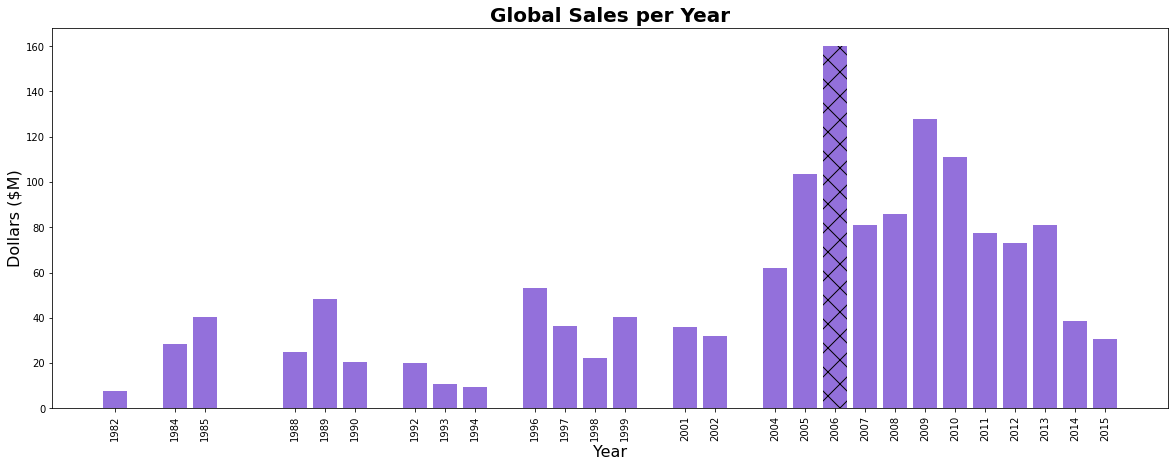

In [8]:
df_year = games.groupby('Year').sum().reset_index(drop=False)

# Plot parameters 
figsize = [20, 7]
x = df_year['Year']
y = df_year['Global_Sales']
width = 0.8
color = 'mediumpurple'

# Bar chart
plt.figure(figsize=figsize)
bars = plt.bar(x, y, 
               width=width, 
               color=color)
bars[17].set_hatch('x')

# Non-data objects
plt.title('Global Sales per Year', fontdict={'fontweight':'bold', 'fontsize':20})
plt.xlabel('Year', fontdict={'fontsize':16})
plt.ylabel('Dollars ($M)', fontdict={'fontsize':16})
plt.xticks(df_year['Year'], rotation = 90)

plt.show()

# Labeled 
# for i in range(len(x)):
    # plt.text(i, y[i], y[i], ha='center', va='bottom')

[CBS News: 2006 A Record Year For Video Game Industry](https://www.cbsnews.com/news/2006-a-record-year-for-video-game-industry/)

#### 4.3 Genre popularity


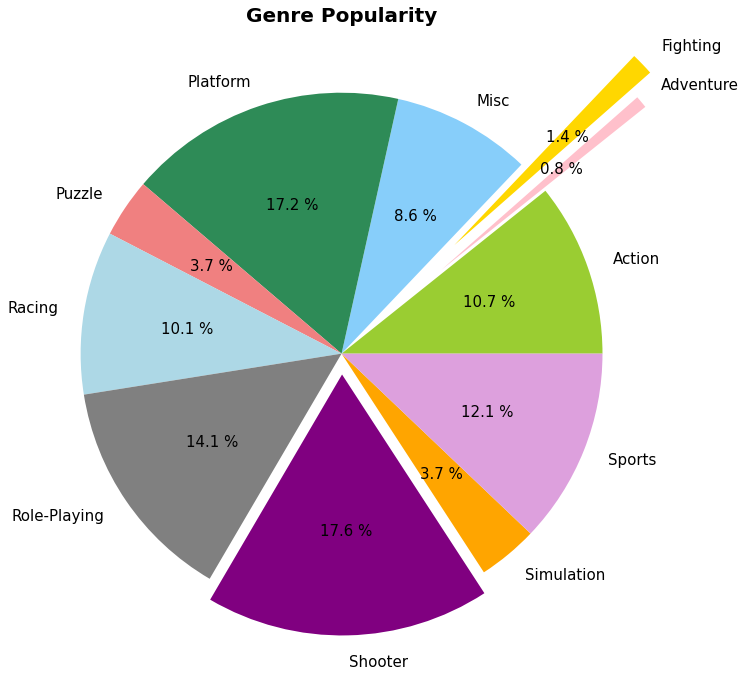

In [9]:
# Summary by genre
df_genre = games.groupby('Genre').sum().reset_index(drop=False)

# Plot parameters
figsize = [12, 12]
x = [i for i in df_genre['Global_Sales']]
labels = [i for i in df_genre['Genre']]
colors = ['yellowgreen','pink','gold','lightskyblue','seagreen','lightcoral','lightblue','grey', 'purple', 'orange','plum','violet','magenta','cyan']
explode = [0, 0.5, 0.6, 0, 0, 0, 0, 0, 0.08, 0, 0]
autopct = '%.1f %%'
textprops = {'fontsize': 15}

# Pie chart
plt.figure(figsize=figsize)
plt.pie(x, 
        labels=labels, 
        colors=colors,
        autopct=autopct, 
        explode=explode,
        textprops=textprops)

# Non-data objects
plt.title('Genre Popularity', fontdict={'fontweight':'bold', 'fontsize':20})

plt.show()



#### 4.4 Platform

In [10]:
platform = games[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]
platform = platform.groupby('Platform').sum().sort_values('NA_Sales', ascending=False).reset_index(drop=False)
platform.style.set_properties(**{'background-color': 'turquoise'}, subset=['NA_Sales'])

,Platform,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii,156.380000,109.990000,34.180000,330.920000
1,X360,120.950000,51.190000,1.430000,189.920000
2,DS,72.660000,65.140000,52.080000,207.170000
3,NES,70.940000,8.830000,11.630000,93.290000
4,GB,66.350000,27.120000,31.630000,128.690000
5,PS3,41.380000,46.520000,4.730000,111.480000
6,PS2,37.600000,17.570000,6.880000,84.750000
7,3DS,27.940000,21.060000,21.470000,75.040000
8,SNES,26.670000,8.850000,12.470000,49.220000
9,N64,22.360000,8.690000,5.720000,37.450000


* About a few most successful platforms

[Color list](https://matplotlib.org/stable/gallery/color/named_colors.html)

### Publishers

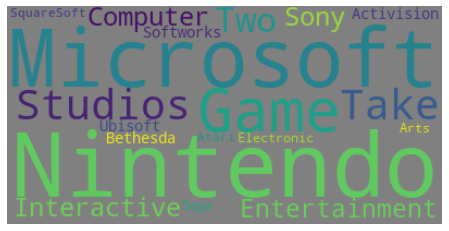

In [11]:
text = ' '.join(games['Publisher'].unique())
wordcloud = WordCloud(max_font_size=100, background_color='gray').generate(text)

plt.figure(figsize=(9, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()